In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge

import warnings
warnings.filterwarnings('ignore')

In [2]:
Data = pd.read_csv('Oxford_Data.csv')
columns_to_remove = ['sun']
Data = Data.drop(columns=columns_to_remove)
Data.dtypes    

yyyy    float64
mm      float64
tmax     object
tmin     object
af       object
rain     object
dtype: object

In [3]:
Data['yyyy'] = pd.to_numeric(Data['yyyy'], errors='coerce').astype('Int64')
Data['mm'] = pd.to_numeric(Data['mm'], errors='coerce').astype('Int64')
Data['tmax'] = pd.to_numeric(Data['tmax'], errors='coerce')
Data['tmin'] = pd.to_numeric(Data['tmin'], errors='coerce')
Data['af'] = pd.to_numeric(Data['af'], errors='coerce')
Data['rain'] = pd.to_numeric(Data['rain'], errors='coerce')    
Data.dtypes

yyyy      Int64
mm        Int64
tmax    float64
tmin    float64
af      float64
rain    float64
dtype: object

In [4]:
Data = Data.drop(index = Data.index[0])
Data.apply(pd.isnull).sum() # missing values
Data['tavg'] = (Data['tmax']+Data['tmin'])/2
Data

,yyyy,mm,tmax,tmin,af,rain,tavg
1,1853,1,8.4,2.7,4.0,62.8,5.55
2,1853,2,3.2,-1.8,19.0,29.3,0.70
3,1853,3,7.7,-0.6,20.0,25.9,3.55
4,1853,4,12.6,4.5,0.0,60.1,8.55
5,1853,5,16.8,6.1,0.0,59.5,11.45
...,...,...,...,...,...,...,...
2043,2023,3,10.6,4.5,NaN,4.9,7.55
2044,2023,4,13.7,5.1,1.0,65.9,9.40
2045,2023,5,18.3,NaN,0.0,51.2,NaN
2046,2023,6,23.8,12.1,0.0,40.5,17.95


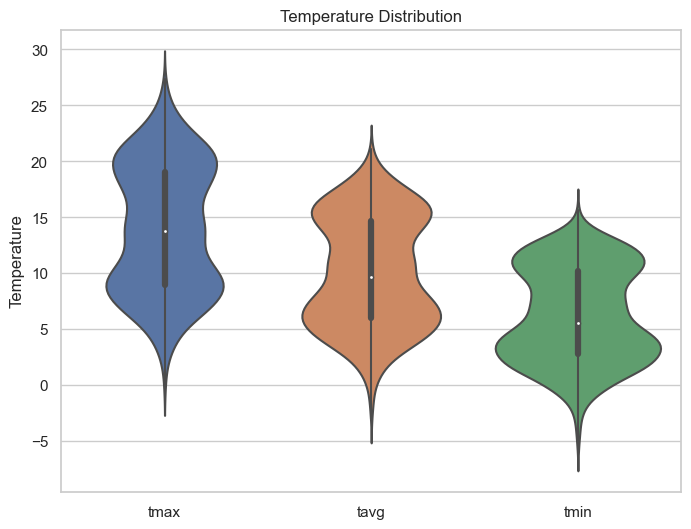

In [30]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a violin plot of temperature distribution
plt.figure(figsize=(8, 6))

sns.violinplot(data=Data[['tmax', 'tavg', 'tmin']])
plt.ylabel('Temperature')
plt.title('Temperature Distribution')

plt.show()

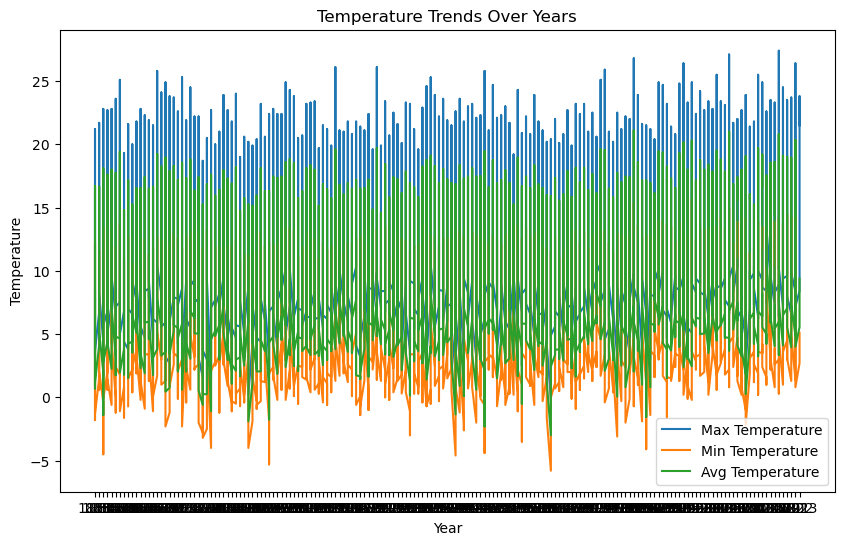

In [31]:
# Plotting temperature data over months
plt.style.use('default')
plt.figure(figsize=(10, 6))

plt.plot(Data['yyyy'], Data['tmax'], label='Max Temperature')
plt.plot(Data['yyyy'], Data['tmin'], label='Min Temperature')
plt.plot(Data['yyyy'], Data['tavg'], label='Avg Temperature')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Trends Over Years')
plt.legend()

plt.show()

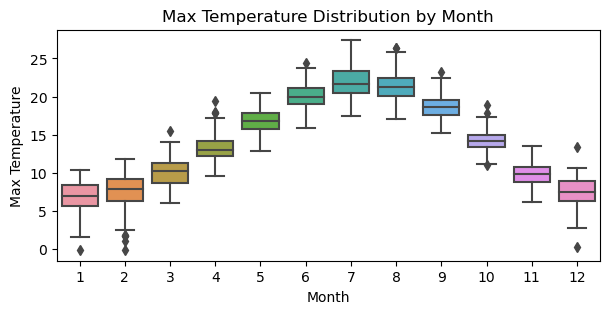

In [32]:
# Box plot
fig, ax = plt.subplots(figsize=(7, 3))
box_plot_Df = sns.boxplot(x=Data['mm'], y=Data['tmax'], ax=ax)

# Label the axes and add title
ax.set_xlabel('Month')
ax.set_ylabel('Max Temperature')
ax.set_title('Max Temperature Distribution by Month')

plt.show()

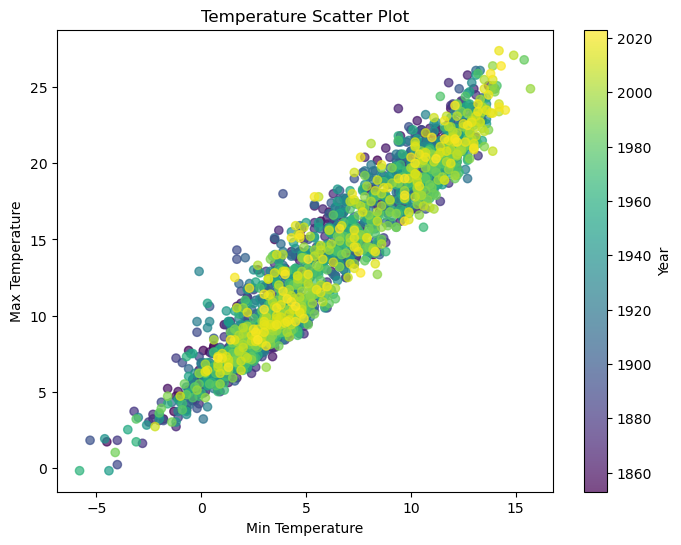

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame (assuming 'Data' is your DataFrame)
# Data = ...

# Convert 'yyyy' to integer
Data['yyyy'] = Data['yyyy'].astype(int)

plt.figure(figsize=(8, 6))

# Create a scatter plot with color based on 'yyyy' using a colormap
plt.scatter(Data['tmin'], Data['tmax'], c=Data['yyyy'], cmap='viridis', alpha=0.7)

# Add colorbar
plt.colorbar(label='Year')

plt.xlabel('Min Temperature')
plt.ylabel('Max Temperature')
plt.title('Temperature Scatter Plot')
plt.show()

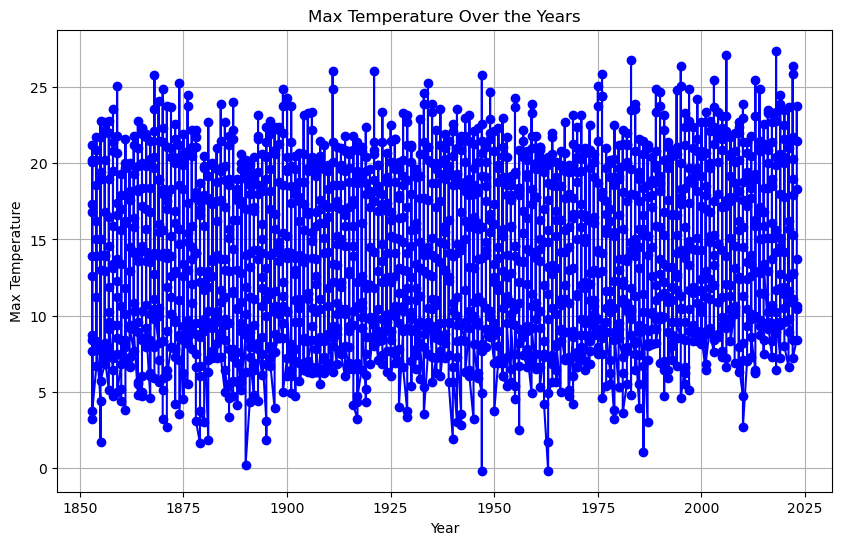

In [36]:
# Assuming you have a DataFrame named 'Data' with the 'yyyy' and 'tmax' columns
plt.figure(figsize=(10, 6))
plt.plot(Data['yyyy'], Data['tmax'], marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Max Temperature')
plt.title('Max Temperature Over the Years')
plt.grid(True)

plt.show()

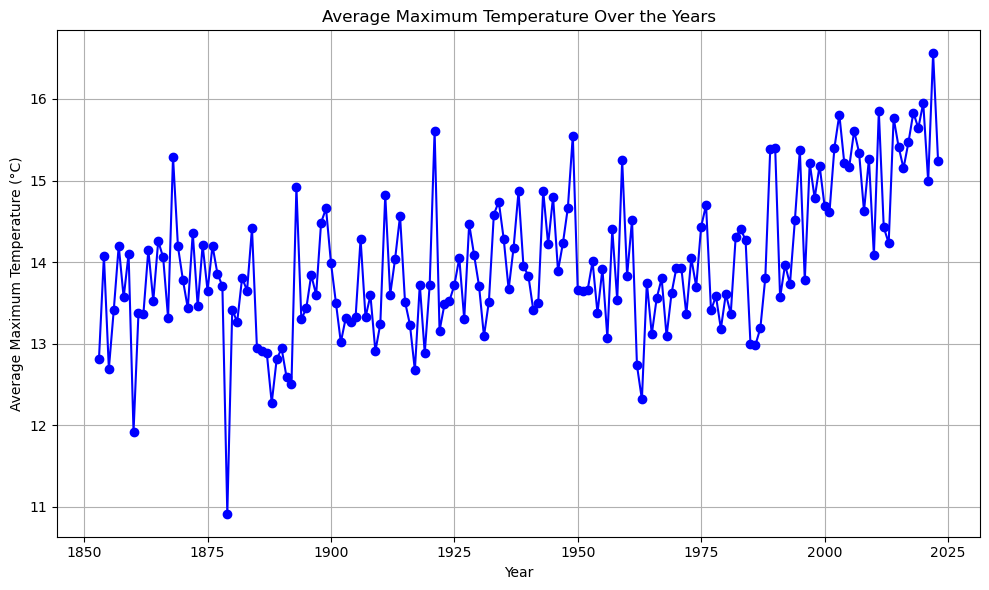

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# Assuming you have already loaded your dataset into a variable named "Data"

# Convert the 'yyyy' column to integers
Data['yyyy'] = Data['yyyy'].astype(int)

# Calculate the mean max temperature for each year
mean_max_temps = Data.groupby('yyyy')['tmax'].mean()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(mean_max_temps.index, mean_max_temps.values, marker='o', linestyle='-', color='b')
plt.title('Average Maximum Temperature Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Maximum Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

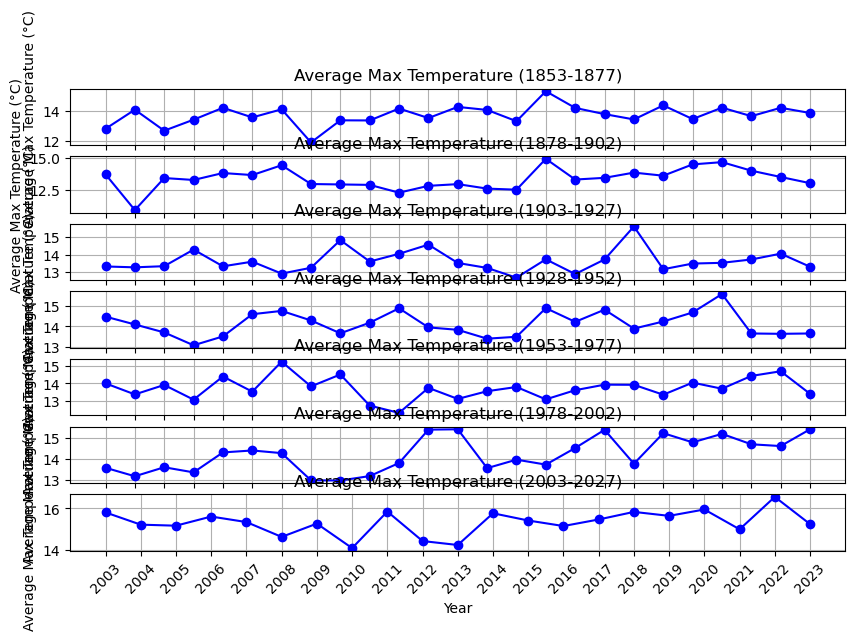

In [17]:
import matplotlib.pyplot as plt

# Group data by year and calculate the mean tmax for each year
mean_max_temps_year = Data.groupby('yyyy')['tmax'].mean()

# Create subplots for each 25-year period
fig, axs = plt.subplots(len(range(1853, 2023, 25)), figsize=(10, 6))

for i, start_year in enumerate(range(1853, 2023, 25)):
    end_year = start_year + 24
    subset = mean_max_temps_year[(mean_max_temps_year.index >= start_year) & (mean_max_temps_year.index <= end_year)]
    
    axs[i].plot(subset.index, subset.values, marker='o', linestyle='-', color='b')
    axs[i].set_title(f'Average Max Temperature ({start_year}-{end_year})')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Average Max Temperature (°C)')
    axs[i].grid(True)
    axs[i].set_xticks(subset.index)
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

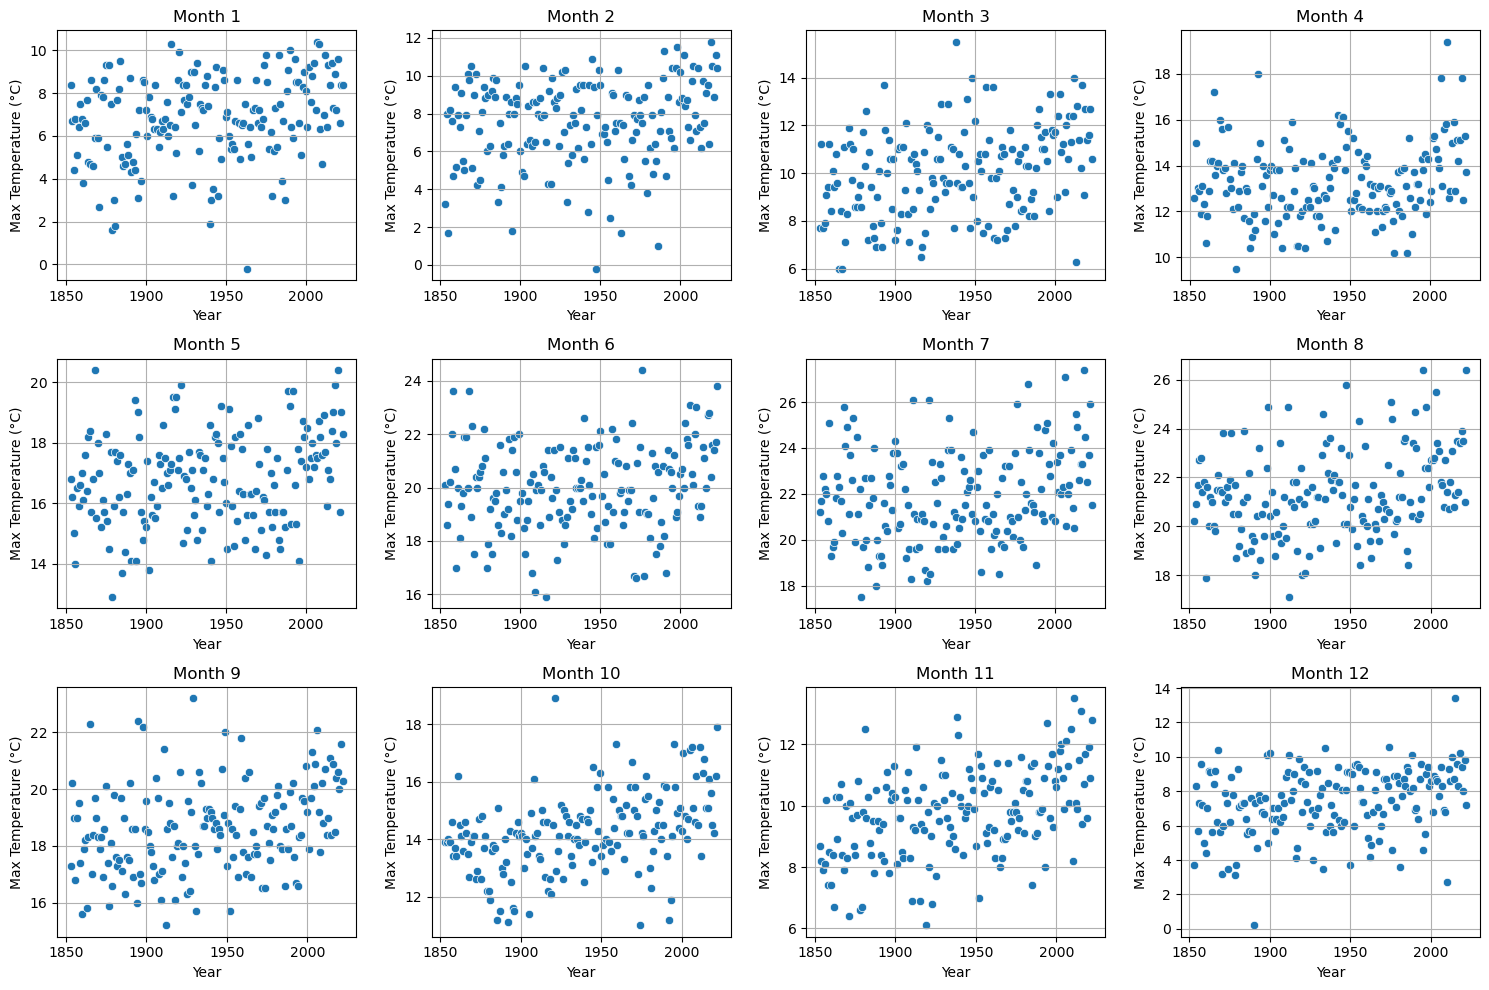

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x4 grid for the scatter plots (3 rows, 4 columns)
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Loop through each month and create a scatter plot for max temperature variation
for month in range(1, 13):
    row = (month - 1) // 4  # Calculate the row index
    col = (month - 1) % 4   # Calculate the column index
    
    month_data = Data[Data['mm'] == month]
    
    ax = axes[row, col]
    sns.scatterplot(data=month_data, x='yyyy', y='tmax', ax=ax)
    ax.set_title(f'Month {month}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Max Temperature (°C)')
    ax.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


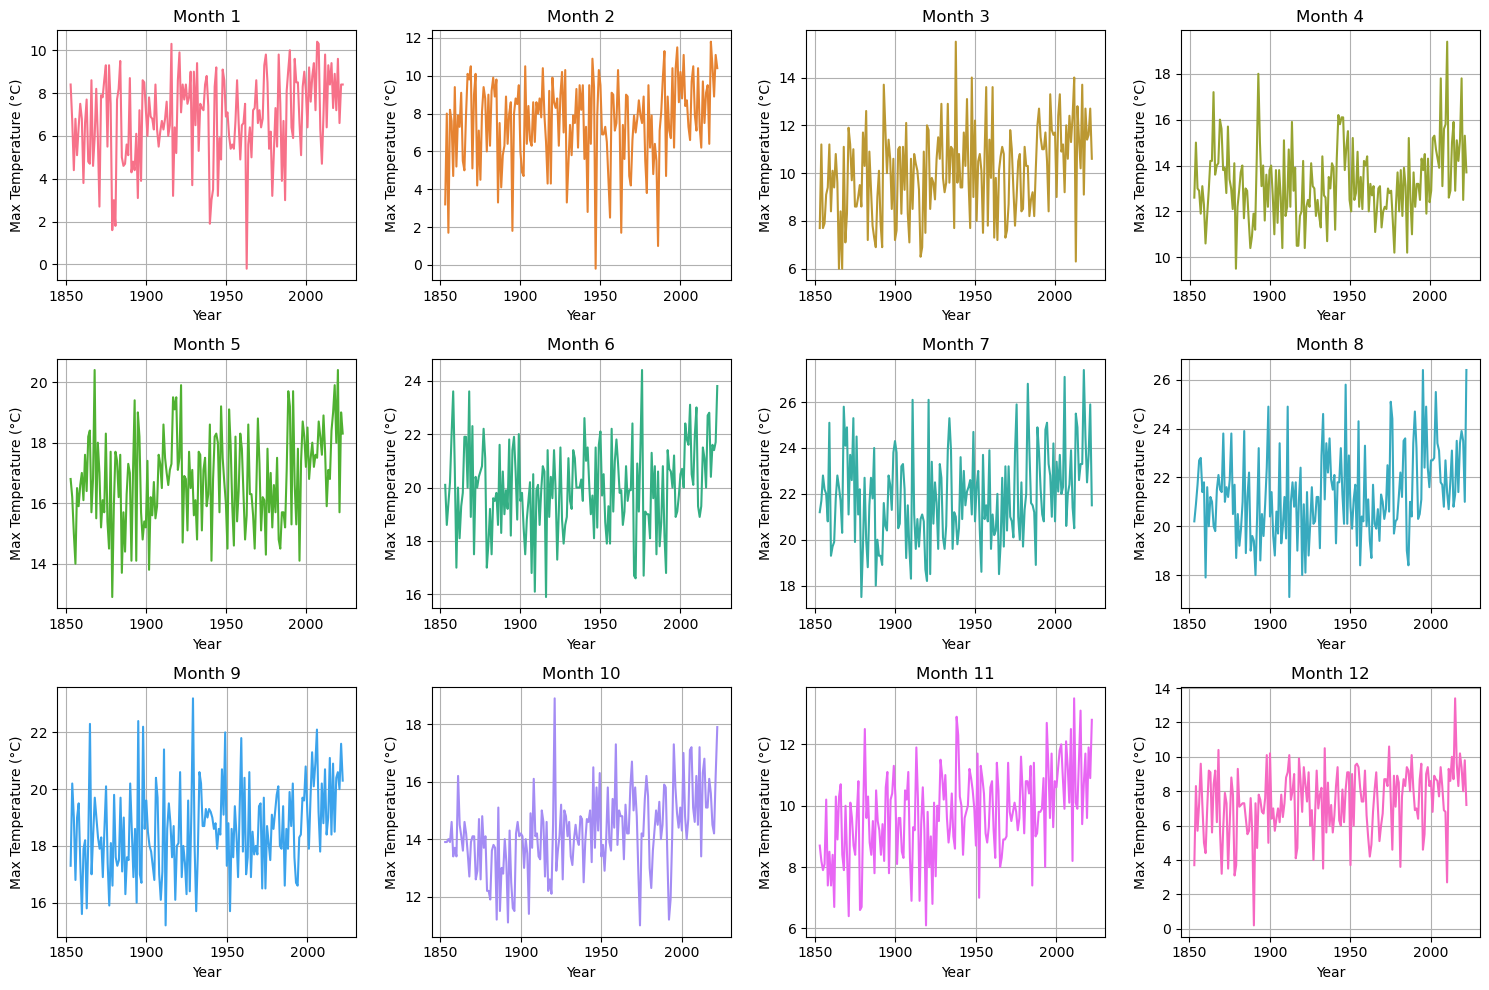

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x4 grid for the line plots (3 rows, 4 columns)
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Define a color palette for the months
color_palette = sns.color_palette("husl", 12)

# Loop through each month and create a line plot for max temperature variation
for month in range(1, 13):
    row = (month - 1) // 4  # Calculate the row index
    col = (month - 1) % 4   # Calculate the column index
    
    month_data = Data[Data['mm'] == month]
    
    ax = axes[row, col]
    sns.lineplot(data=month_data, x='yyyy', y='tmax', ax=ax, color=color_palette[month-1])
    ax.set_title(f'Month {month}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Max Temperature (°C)')
    ax.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

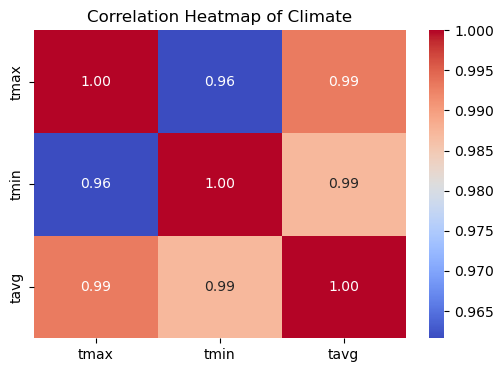

In [37]:
# Select relevant columns for correlation analysis
selected_columns = ['tmax', 'tmin', 'tavg']
correlation_matrix = Data[selected_columns].corr()

# Create a correlation heatmap using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title and labels
plt.title('Correlation Heatmap of Climate')
# Display the heatmap
plt.show()

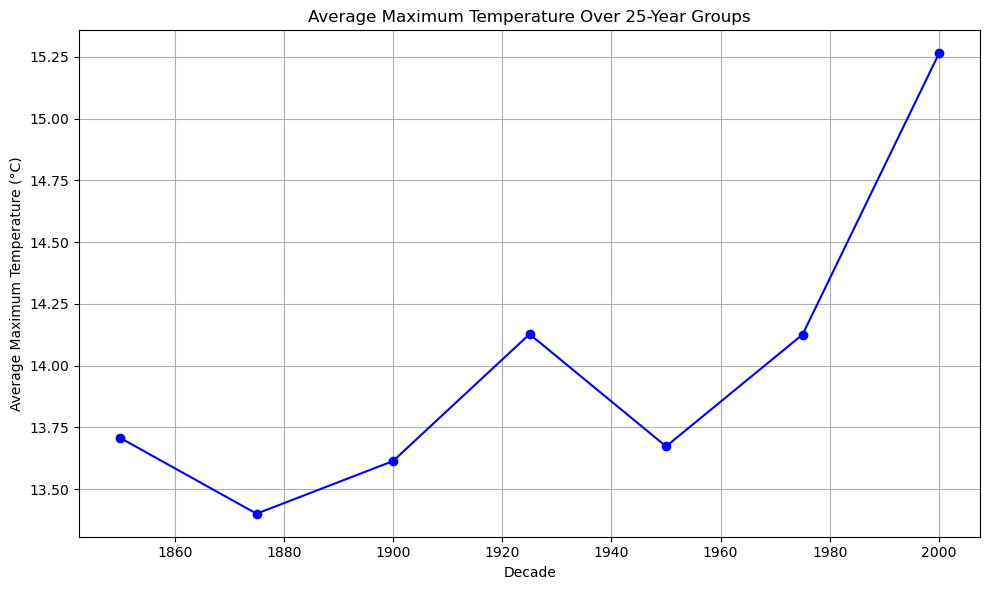

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# Assuming you have already loaded your dataset into a variable named "Data"

# Convert the 'yyyy' column to integers
Data['yyyy'] = Data['yyyy'].astype(int)

# Calculate the mean max temperature for each 25-year group
Data['decade'] = (Data['yyyy'] // 25) * 25
mean_max_temps = Data.groupby('decade')['tmax'].mean()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(mean_max_temps.index, mean_max_temps.values, marker='o', linestyle='-', color='b')
plt.title('Average Maximum Temperature Over 25-Year Groups')
plt.xlabel('Decade')
plt.ylabel('Average Maximum Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df8 = df[df['country_name'] == 'World']
y1969 = df8[df8['year'] == '1969'].head(12)
y1979 = df8[df8['year'] == '1979'].head(12)
y1989 = df8[df8['year'] == '1989'].head(12)
y1999 = df8[df8['year'] == '1999'].head(12)
y2009 = df8[df8['year'] == '2009'].head(12)
y2019 = df8[df8['year'] == '2019'].head(12)

fig, ax = plt.subplots(figsize=(17, 7))

plt.plot(y1969['months'], y1969['temp_change'], '-', color='green', label='1969')
plt.plot(y1979['months'], y1979['temp_change'], '-', color='seagreen', label='1979')
plt.plot(y1989['months'], y1989['temp_change'], '-', color='limegreen', label='1989')
plt.plot(y1999['months'], y1999['temp_change'], '-', color='orange', label='1999')
plt.plot(y2009['months'], y2009['temp_change'], '-', color='orangered', label='2009')
plt.plot(y2019['months'], y2019['temp_change'], '-', color='red', label='2019')

plt.legend(fontsize='large')
plt.title("Global Temperature Change Every 10 Years (1969-2019)", weight='bold')
plt.xlabel("Months")
plt.ylabel("Temperature Change (°C)")
plt.show()